## Temperatur lokalt og globalt

I denne oppgaven ser vi på: 
- Temperaturanomalier fra Bergen og globalt
- Anomalier i global CO2 i atmosfæren. 
- Trendlinjer og polynom av ulik orden, og den fysiske betydningen av disse.
- Ulike måter å presentere og sammenligne data på. 

Vi bruker fire datasett:
- Temperaturdata for Bergen: [last ned her](https://github.com/irendundas/EkteData/blob/main/data/Bergen_temp1862_2022.txt). Dette datasettet er komilert av Helge Drange basert på data fra Meteorologisk institutt. 
- Temperaturdata globalt: [last ned her](https://climate.metoffice.cloud/temperature.html#datasets) (bla ned til "Get the data" og last ned HadCRUT5, NOAAGlobalTemp, eller GISTEMP. I eksempelet her bruker jeg HadCRUT5). 
- CO2 data frem til 2004: [last ned her](https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/law/law2006.txt). Disse datene er basert på iskjerner. Datasettet har mye informasjon vi ikke trenger, vi laster det inn på en ryddig måte ca halvveis i oppgaven. 
- CO2 data fra 1959 frem til idag: [last ned her](https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.txt) 

#### Temperaturstripe-figurene i denne oppgaven er inpirert av [Ed Hawkins sin figur](https://www.wfla.com/wp-content/uploads/sites/71/2022/06/PAGES2K-ED-HAWKINS-CLIMATE-STRIPES.jpg?w=900)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [2]:
SMALL_SIZE = 13
MEDIUM_SIZE = 17
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Del 1: Temperatur
I denne delen ser vi på temperatur-anomalier. Dette betyr at vi ser på temperaturavvik i forhold til en satt referanseperiode. For HadCRUT5 er referanseperioden 1961–1990 ([Morice et al., 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019JD032361)).

### Last ned datasett over global temperatur 
Følg denne [lenken](https://climate.metoffice.cloud/temperature.html#datasets) og last ned et av datasettene under **Global mean temperature**. Pass på at du lagrer filen på et logisk sted. 
Under bruker jeg datasettet fra HadCRUT5.

Last så datasettet over global temperatur inn i Python. 


In [3]:
# Datasettet over global temperatur

# Endre denne stien til der du lastet ned filen med Global temperatur på din PC
sti='W:/Work/Documents/EkteData/ikkeGit/temperaturstriper'
fil='/gmt_HadCRUT5.csv'

# Pass på at resultatet av sti+fil er nøyaktig det samme som der filen
# faktisk ligger på PCen din. 
sti+fil

'W:/Work/Documents/EkteData/ikkeGit/temperaturstriper/gmt_HadCRUT5.csv'

Se [her](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for forklaring på keywordene (sep, index_col etc).

In [4]:
df = pd.read_csv(
    sti+fil, 
    sep=',', 
    decimal='.', 
    index_col=False, 
    header=4,
    skipinitialspace=True # Skip spaces after delimiter.
)

# From the doc: index_col=False can be used to force pandas to not use the 
# first column as the index, e.g. when you have a malformed file with 
# delimiters at the end of each line.

In [5]:
# Print ut datasettet for å se hvordan det ser ut. 
df

,Year,HadCRUT5 (degC),HadCRUT5 uncertainty
0,1850,-0.08,0.172
1,1851,0.11,0.179
2,1852,0.11,0.180
3,1853,0.07,0.160
4,1854,0.05,0.141
...,...,...,...
169,2019,1.23,0.034
170,2020,1.26,0.035
171,2021,1.10,0.036
172,2022,1.14,0.036


In [6]:
# Lag en "dictionary" for tid og temperatur for å slippe å holde styr på så mange 
# variabler når vi etterpå laster inn tid og temp for Bergen også.
tid, temp={},{}

In [7]:
# Gi den første kolonnen (iloc[:,0]) til "tid" og den andre kolonnen (iloc[:,1]) til "temp"
tid['Global']=np.copy(df.iloc[:,0])
temp['Global']=np.copy(df.iloc[:,1])

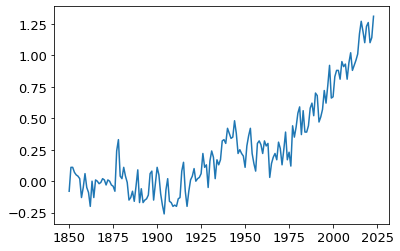

In [8]:
# Lag en figur for å få et intrykk av datasettet
plt.plot(tid['Global'], temp['Global'])

### Last inn datasettet over temperatur i Bergen
Du finner datasettet [her](github.com/irendundas/EkteData/blob/main/data/Bergen_temp1862_2022.txt).


In [9]:
sti='W:/Work/Documents/EkteData/EkteData/data'
fil='/Bergen_temp1862_2022.txt'

df = pd.read_csv(
    sti+fil, 
    sep=' ', 
    decimal='.', 
    index_col=False, 
    header=4,
    skipinitialspace=True 
)

In [10]:
df

,Year,null,temp,anomaly
0,1862,0,7.76,0.13
1,1863,0,7.78,0.15
2,1864,0,6.91,-0.72
3,1865,0,7.28,-0.35
4,1866,0,7.45,-0.18
...,...,...,...,...
155,2018,0,8.74,1.11
156,2019,0,8.85,1.23
157,2020,0,9.46,1.83
158,2021,0,8.50,0.88


In [11]:
# Lagre tid og temperatur som egne variabler i "dictionaryene" tid og temp:

tid['Bergen']=np.copy(df.iloc[:,0])
# Vi vil se på anomalier, så vi setter den tredje kolonnen til temp['Bergen']
temp['Bergen']=np.copy(df.iloc[:,3]) 

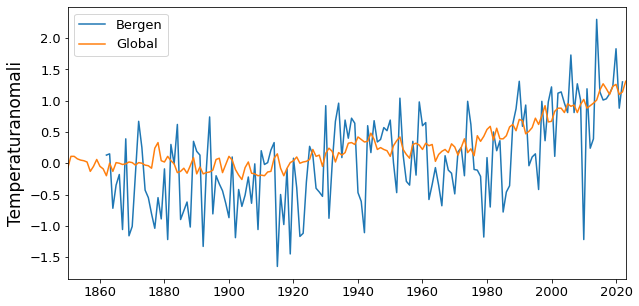

In [12]:
# Plot både global og Bergen sin temperatur i samme figur
plt.figure(figsize=(10,5))

plt.plot(tid['Bergen'], temp['Bergen'], label='Bergen')
plt.plot(tid['Global'], temp['Global'], label='Global')
plt.legend()
plt.ylabel('Temperaturanomali')
plt.xlim([1850,2023])
plt.show()

### Spørsmål
#### Det er to typer variabilitet i dataene: temperaturanomaliene varierer fra år til år, men også over lang tid
- Hvorfor varierer temperaturanomaliene så mye mer fra år til år i Bergen enn globalt? 
- Hvorfor er variabiliteten likevel så lik over lang tid?

_____________
### Beskriv langtidsvariasjonen i Bergen: 
Legg på tre trendlinjer:
- En for hele datasettet, 
- en for perioden fra jeg er født til idag,
- en for perioden fra dere er født (ca 1970?) til idag.


In [13]:
# Finn indeksen til år 1994, og 1970
id94=np.where(tid['Bergen']==1994)[0][0]
id70=np.where(tid['Bergen']==1970)[0][0]

# Sjekk at indeksene vi har funnet stemmer
tid['Bergen'][id94], tid['Bergen'][id70]

(1994, 1970)

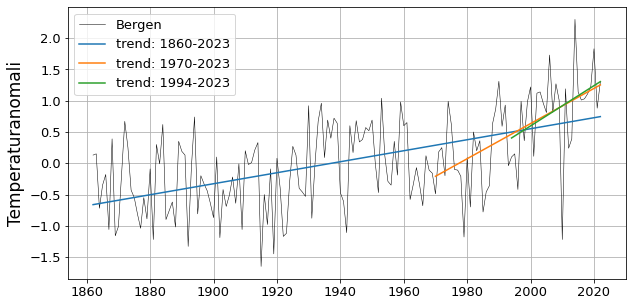

In [14]:
plt.figure(figsize=(10,5))
# Hele tidsserien
plt.plot(tid['Bergen'], temp['Bergen'], 'k', linewidth=0.5, label='Bergen') 
# trenden til hele tidsserine
a, b = np.polyfit(tid['Bergen'], temp['Bergen'], 1) 
plt.plot(tid['Bergen'], a*tid['Bergen'] + b, 'C0', label='trend: 1860-2023')
 # trenden siden 1970
a, b = np.polyfit(tid['Bergen'][id70:], temp['Bergen'][id70:], 1)
plt.plot(
    tid['Bergen'][id70:], a*tid['Bergen'][id70:] + b, 
    'C1', label='trend: 1970-2023'
)
# trenden siden 1994
a, b = np.polyfit(tid['Bergen'][id94:], temp['Bergen'][id94:], 1) 
plt.plot(
    tid['Bergen'][id94:], a*tid['Bergen'][id94:] + b, 
    'C2', label='trend: 1994-2023'
)

plt.legend()
plt.ylabel('Temperaturanomali')

plt.grid()
plt.show()

In [15]:
a, b = np.polyfit(tid['Bergen'], temp['Bergen'], 1) # trenden til hele tidsserine
x=(a*tid['Bergen'][-1] + b)-(a*tid['Bergen'][0] + b)
x="{:.1f}".format(x) # Skriv bare ut en desimal. 

print(
    'Trenden indikerer at for hele perioden har temperaturen i bergen økt med ', 
    x, 'grader'
)

Trenden indikerer at for hele perioden har temperaturen i bergen økt med  1.4 grader


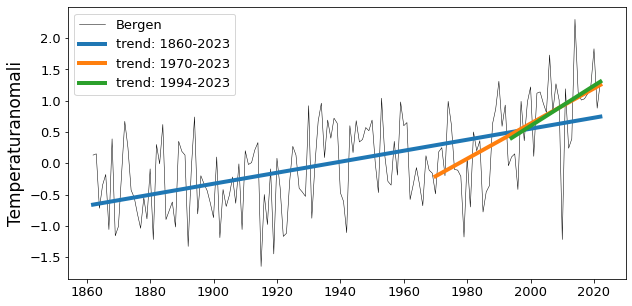

In [16]:
# Plottingen av figuren over blir ryddigere med en for-løkke
plt.figure(figsize=(10,5))

plt.plot(tid['Bergen'], temp['Bergen'], 'k', linewidth=0.5, label='Bergen')

idt=[0, id70, id94]
labels=['trend: 1860-2023', 'trend: 1970-2023', 'trend: 1994-2023']
for count,start in enumerate(idt):
    a, b = np.polyfit(tid['Bergen'][start:], temp['Bergen'][start:], 1)   
    plt.plot(
        tid['Bergen'][start:], a*tid['Bergen'][start:] + b, 
        'C'+str(count), label=labels[count], lw=4
    )
plt.ylabel('Temperaturanomali')
plt.legend()
plt.show()


### Spørsmål
- Hva er forskjellen på trendlinjene?
- Hva skjer med trendlinjene når startdatoen for beregningsperioden øker? 
- Hva betyr dette fysisk?

### Oppgave: Kan du stole på trendlinjene?
- Beregn trenden for de to periodene 1977-2000 og 1990-2013. 
- Anta at begge trendene representerer endringen i temperatur for Bergen for de 160 årene vi har med data. 
    - I følge trend nr 1, hvor mye har temperaturen endret seg de siden starten av tidsserien?
    - Hva med i følge trend nr 2?
- Forskjellen er stor! Vær alltid obs på om trender du presenterer (eller får presentert) er robuste! Trender bør ikke være sterkt påvirket av valg av start og slutt. 


endring de siste 160 årene:  0.5975652173912614 grader
endring de siste 160 årene:  8.178086956522076 grader


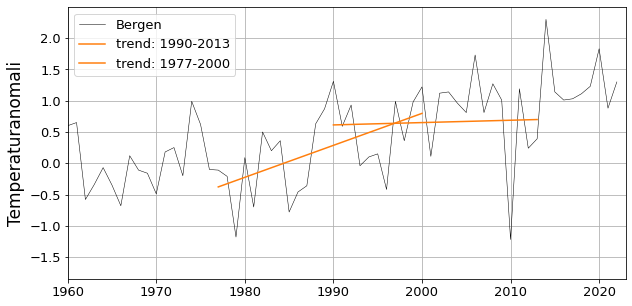

In [17]:
plt.figure(figsize=(10,5))
# Hele tidsserien
plt.plot(tid['Bergen'], temp['Bergen'], 'k', linewidth=0.5, label='Bergen') 
id1=np.where(tid['Bergen']==1990)[0][0]
id2=np.where(tid['Bergen']==2013)[0][0]+1
# trenden siden 1970
a, b = np.polyfit(tid['Bergen'][id1:id2], temp['Bergen'][id1:id2], 1)
print('endring de siste 160 årene: ', a*160, 'grader')
plt.plot(
    tid['Bergen'][id1:id2], a*tid['Bergen'][id1:id2] + b, 
    'C1', label='trend: 1990-2013'
)
id1=np.where(tid['Bergen']==1977)[0][0]
id2=np.where(tid['Bergen']==2000)[0][0]+1
# trenden siden 1994
a, b = np.polyfit(tid['Bergen'][id1:id2], temp['Bergen'][id1:id2], 1)
print('endring de siste 160 årene: ', a*160, 'grader')
plt.plot(
    tid['Bergen'][id1:id2], a*tid['Bergen'][id1:id2] + b, 
    'C1', label='trend: 1977-2000'
)

plt.legend()
plt.ylabel('Temperaturanomali')
plt.xlim(1960, 2023)
plt.grid()
plt.show()


_____________
### Beskriver et andregradspolynom utviklingen av temperatur bedre? 

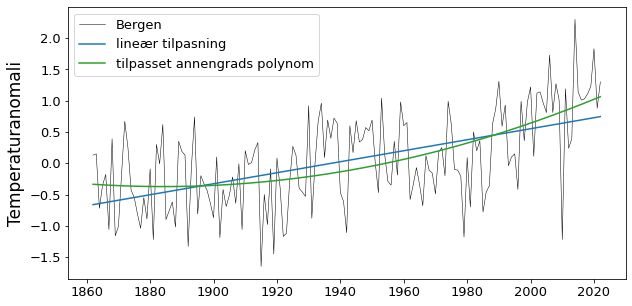

In [18]:
plt.figure(figsize=(10,5))

plt.plot(tid['Bergen'], temp['Bergen'], 'k', linewidth=0.5, label='Bergen')
# trenden til hele tidsserine
a, b = np.polyfit(tid['Bergen'], temp['Bergen'], 1) 
plt.plot(tid['Bergen'], a*tid['Bergen'] + b, 'C0', label='lineær tilpasning')
# Andregrads polynom tilpasset dataene
a = np.polyfit(tid['Bergen'], temp['Bergen'], 2) 
plt.plot(
    tid['Bergen'], 
    a[0]*tid['Bergen']**2 + a[1]*tid['Bergen'] + a[2], 
    'C2', label='tilpasset annengrads polynom'
)
plt.ylabel('Temperaturanomali')
plt.legend()
plt.show()

### Spørsmål
- Hva slags informasjon får vi av andregradspolynomet som vi ikke fikk av den lineære trendlinjen over hele tidsserien? 

______________
### Oppgave: Hva med den globale trendlinjen?
- Beregn trendlinjen for den globale tidsserien. 
- Plot trendlinjen globalt og for Bergen i samme figur for å sammeligne dem lettere. 
- Tips: start tidsseien i 1862 for at tidsseriene skal stemme overens. 

In [19]:
tid['Bergen'][0], tid['Global'][0]

(1862, 1850)

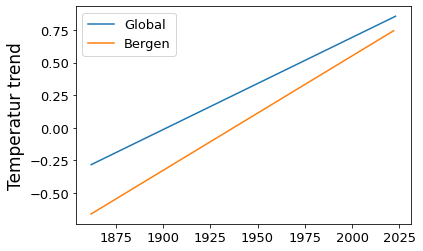

In [20]:
id62=np.where(tid['Global']==1862)[0][0]

a, b = np.polyfit(tid['Global'][id62:], temp['Global'][id62:], 1)   
plt.plot(tid['Global'][id62:], a*tid['Global'][id62:] + b, label='Global')

a, b = np.polyfit(tid['Bergen'], temp['Bergen'], 1)   
plt.plot(tid['Bergen'], a*tid['Bergen'] + b, label='Bergen')
plt.legend()
plt.ylabel('Temperatur trend')

plt.show()

### Spørsmål
- Hva forteller de lineære trendlinjene oss om den globale temperaturendringen vs temperaturendringen i Bergen?

______________

### Plot tidsserien som et histogram med fargene brukt i den originale "temperaturstripe"-figuren laget av [Ed Hawkins](https://www.wfla.com/wp-content/uploads/sites/71/2022/06/PAGES2K-ED-HAWKINS-CLIMATE-STRIPES.jpg?w=900).

In [21]:
# Fargekart fra den originale tremperaturstripe-figuren 
# med 8 blå og 8 røde farger 
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])


Notat: I kodecellen under er denne linjen: `color=cmap((temp['Global']+span)/(2*span))`. 
Vi vil at alle temperaturanomalier som er under 0 skal bli blå, og at alle anomalier som er over 0 skal vi røde. 
Det er litt komplisert å forklare hvorfor dette fungerer, og det er heller ikke hovedpoenget med denne oppgaven. Under kommer en kort forklaring, men du må gjerne hoppe over å forstå akkurat denne sammenhengen. 

For å gjøre anomaliene over null røde og anomaliene under null blå normaliserer vi temperaturverdiene mellom 0 og 1. 
Siden anomaliene i starten av tidsserien er nærme 0 blir fargene i starten lyse. Dette er fargene på midten av vektoren cmap. Mot slutten av tidsserien er temperaturen godt over 0, og fargene blir derfor mørkerøde. 
Variabelen `max_anomaly` er den største temperatur-anomalien. Ved å bruke denne verdien til å normalisere får den største anomalien i plottet vårt den mørkeste røde fargen. 



In [76]:
max_anomaly=max(temp['Global'])

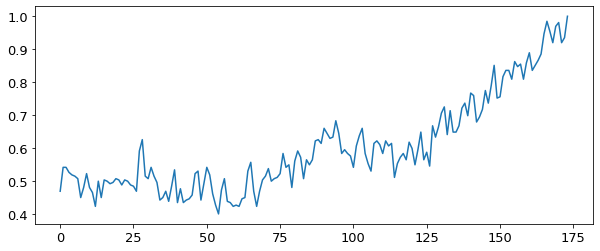

In [77]:
# Denne figuren viser at anomalier nærme 0 blir 0.5, mens max-anomaliene blir 1. 
# Hvis det fantes negative anomalier som var like sterke som den positive ville disse blitt 0. 
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
plt.plot((temp['Global']+max_anomaly)/(2*max_anomaly))


(-2.0, 2.4)

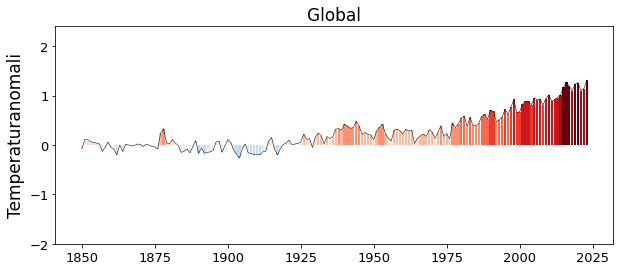

In [86]:
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
plt.bar(
    tid['Global'], temp['Global'], 
    color=cmap((temp['Global']+max_anomaly)/(2*max_anomaly)) #normalize data values to the range [0, 1]
) 
    
plt.plot(tid['Global'], temp['Global'], 'k', linewidth=0.5)
plt.ylabel('Temperaturanomali')
plt.title('Global')
plt.ylim(-2, 2.4)

Text(0.5, 1.0, 'Bergen')

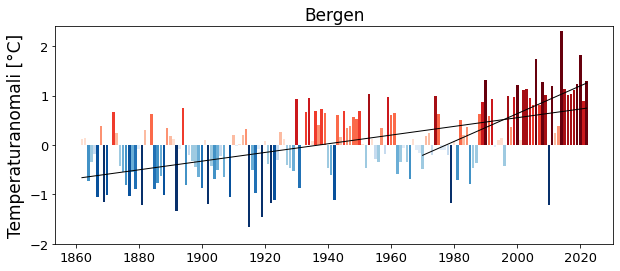

In [87]:
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
plt.bar(tid['Bergen'], temp['Bergen'], color=cmap((temp['Bergen']+max_anomaly)/(2*max_anomaly)))
plt.ylim(-2, 2.4)

# Legg til trendlinjer fra tidligere
idt=[0, id70]
for count,start in enumerate(idt):
    a, b = np.polyfit(tid['Bergen'][start:], temp['Bergen'][start:], 1)   
    plt.plot(
        tid['Bergen'][start:], a*tid['Bergen'][start:] + b, 
        'k', linewidth=1
    )
plt.ylabel('Temperaturanomali [°C]')
plt.title('Bergen')


________________________
### Legg til CO2

Temperatur er knyttet til CO2 i atmosfæren via drivhuseffekten som påvirker den globale strålingsbalansen. Dette blir tydelig dersom vi plotter temperaturanomaliene i samme figur som CO2.

In [98]:
# Last inn datasettet over CO2 fra iskjerner tatt i Antarktis (1832-1978)
sti=r'W:\Work\Documents\EkteData\ikkeGit\temperaturstriper'
fil=r'\Law_co2_complete.txt'

df = pd.read_csv(
    sti+fil, 
    sep=' ', 
    decimal='.', 
    index_col=False, 
    skiprows=2013,
    skipfooter=3676-2187
)

<ipython-input-98-cbc25a21f765>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(


In [99]:
df

,1831,Unnamed: 1,Unnamed: 2,Unnamed: 3,755.4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,0.7,...,Unnamed: 30,Unnamed: 31,1831.0.1,Unnamed: 33,Unnamed: 34,273.3,Unnamed: 36,Unnamed: 37,Unnamed: 38,-0.5
0,1832,NaN,NaN,NaN,756.0,NaN,NaN,NaN,NaN,0.7,...,NaN,NaN,1832.0,NaN,NaN,272.8,NaN,NaN,NaN,-0.6
1,1833,NaN,NaN,NaN,756.7,NaN,NaN,NaN,NaN,0.8,...,NaN,NaN,1833.0,NaN,NaN,272.1,NaN,NaN,NaN,-0.8
2,1834,NaN,NaN,NaN,757.6,NaN,NaN,NaN,NaN,1.0,...,NaN,1834.0,NaN,NaN,271.2,NaN,NaN,NaN,-0.9,NaN
3,1835,NaN,NaN,NaN,758.8,NaN,NaN,NaN,NaN,1.3,...,NaN,1835.0,NaN,NaN,270.4,NaN,NaN,NaN,-0.8,NaN
4,1836,NaN,NaN,NaN,760.1,NaN,NaN,NaN,NaN,1.4,...,NaN,NaN,1836.0,NaN,NaN,269.7,NaN,NaN,NaN,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2000,NaN,NaN,1703.4,NaN,NaN,NaN,NaN,3.9,NaN,...,2000.0,NaN,NaN,315.4,NaN,NaN,NaN,NaN,0.8,NaN
169,2001,NaN,NaN,1706.5,NaN,NaN,NaN,NaN,2.4,NaN,...,2001.0,NaN,NaN,316.2,NaN,NaN,NaN,NaN,0.8,NaN
170,2002,NaN,NaN,1708.3,NaN,NaN,NaN,NaN,1.2,NaN,...,2002.0,NaN,NaN,317.0,NaN,NaN,NaN,NaN,0.8,NaN
171,2003,NaN,NaN,1709.1,NaN,NaN,NaN,NaN,0.6,NaN,...,2003.0,NaN,NaN,317.8,NaN,NaN,NaN,NaN,0.8,NaN


In [23]:
tidco2=np.copy(df.iloc[:,0])
co2=np.copy(df.iloc[:,1])

In [24]:
# Last inn datasettet over CO2 fra instrumentelle målinger (1979-2021)
fil='/NOAA_CO2.txt'

df = pd.read_csv(
    sti+fil, 
    sep=' ', 
    decimal='.', 
    skipinitialspace=True,
    skiprows=55
)

In [25]:
# # Sett de to datasettene sammen
# tidco2=tidco2.append(df.iloc[:,0])
# co2=co2.append(df.iloc[:,1])

tidco2=np.append(tidco2, np.copy(df.iloc[:,0]))
co2=np.append(co2, np.copy(df.iloc[:,1]))

Text(0, 0.5, 'CO2')

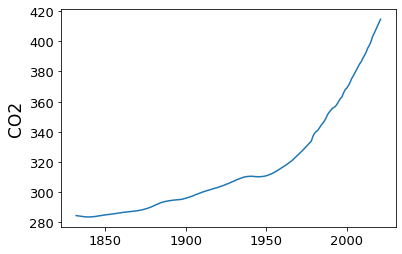

In [26]:
plt.plot(tidco2, co2)
plt.ylabel('CO2')


### Lag en figur med temperaturstriper, andre ordens tilpasset polynom og globalt CO2-nivå

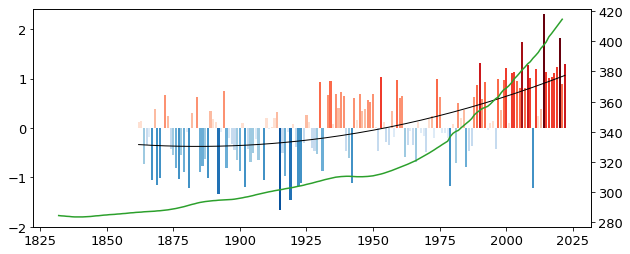

In [27]:
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
for i in range(len(tid['Bergen'])):
    # For limits -2 to 2, with 0.25 degree intervals
    c=int(np.floor((2+temp['Bergen'][i])*4))
    # Some anomalies are larger than 2 degrees. let these have the same color
    # as 2 degrees.
    if c>15:
        c=15
    plt.bar(tid['Bergen'][i], temp['Bergen'][i], color=cmap.colors[c])
plt.ylim(-2, 2.4)

# Legg til trendlinjer fra tidligere
a = np.polyfit(tid['Bergen'], temp['Bergen'], 2)   
plt.plot(
    tid['Bergen'], a[0]*tid['Bergen']**2 
    + a[1]*tid['Bergen'] + a[2], 
    'k', linewidth=1
)
    
# Legg til global CO2
ax2=ax.twinx()
ax2.plot(tidco2, co2, 'C2')


#### Tilpass aksene i figuren for å vise informasjonen tydeligere

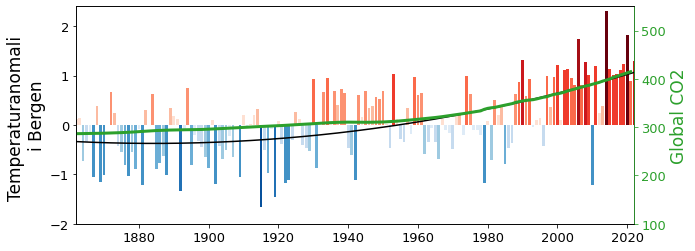

In [28]:
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
for i in range(len(tid['Bergen'])):
    # For limits -2 to 2, with 0.25 degree intervals
    c=int(np.floor((2+temp['Bergen'][i])*4))
    # Some anomalies are larger than 2 degrees. let these have the same color
    # as 2 degrees.
    if c>15:
        c=15
    plt.bar(tid['Bergen'][i], temp['Bergen'][i], color=cmap.colors[c])
plt.ylim(-2, 2.4)

# Legg til trendlinjer fra tidligere
a = np.polyfit(tid['Bergen'], temp['Bergen'], 2)   
plt.plot(
    tid['Bergen'], a[0]*tid['Bergen']**2 
    + a[1]*tid['Bergen'] + a[2], 
    'k'
)

ax.set_ylabel('Temperaturanomali \ni Bergen')
    
# Legg til global CO2
ax2=ax.twinx()
ax2.plot(tidco2, co2, 'C2', linewidth=3)
ax2.set_ylim(100, 550)
ax2.spines['right'].set_color('C2')
ax2.tick_params(axis='y', colors='C2')
ax2.yaxis.label.set_color('C2')
ax2.set_ylabel('Global CO2')


plt.xlim(tid['Bergen'][0], tid['Bergen'][-1])
plt.show()

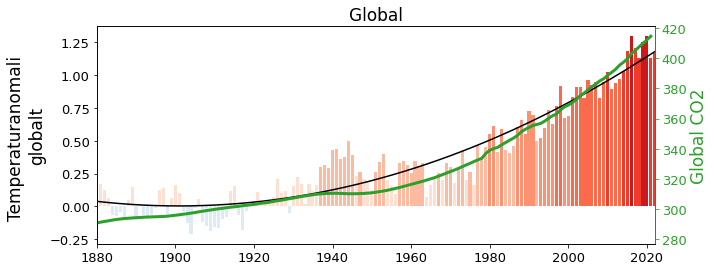

In [30]:
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
for i in range(len(tid['Global'])):
    # For limits -2 to 2, with 0.25 degree intervals
    c=int(np.floor((2+temp['Global'][i])*4))
    plt.bar(tid['Global'][i], temp['Global'][i], color=cmap.colors[c])
    
# Legg til trendlinjer fra tidligere
a = np.polyfit(tid['Global'], temp['Global'], 2)   
plt.plot(
    tid['Global'], a[0]*tid['Global']**2 
    + a[1]*tid['Global'] + a[2], 
    'k'
)

ax.set_ylabel('Temperaturanomali \nglobalt')
    
# Legg til global CO2
ax2=ax.twinx()
ax2.plot(tidco2, co2, 'C2', linewidth=3)
ax2.spines['right'].set_color('C2')
ax2.tick_params(axis='y', colors='C2')
ax2.yaxis.label.set_color('C2')
ax2.set_ylabel('Global CO2')

plt.title('Global')
plt.xlim(tid['Global'][0], tid['Global'][-1])
plt.show()

### Spørsmål
- Hva tror du den globale temperaturanomalien vil være i 2040? 
    - Hvilke antakelser gjør du for å komme frem til svaret ditt? 
- Hva tror du temperaturanomalien i Bergen vil være i 2040?
- Har du mest tiltro til svaret ditt for Bergen eller globalt? Hvorfor? 

- Hva synes du om denne måten å presentere disse dataene på? Hva synes du om å tilpasse aksene slik som over?